# Esplorare i dati qualitativi {#sec-exploring-qualitative-data}

**Prerequisiti**

- Leggere il capitolo [Exploring categorical data](https://openintro-ims.netlify.app/explore-categorical) di [Introduction to Modern Statistics (2e)](https://openintro-ims.netlify.app) di Mine Çetinkaya-Rundel e Johanna Hardin.

**Concetti e competenze chiave**

- Tabelle di contingenza.
- Grafico a barre.

**Preparazione del Notebook**

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import arviz as az
from pathlib import Path
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
seed = sum(map(ord, "frequency_distributions"))
rng = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

## Introduzione {.unnumbered}

In questo capitolo ci concentreremo sull'analisi dei dati qualitativi.

## Il dataset `penguins`

Per fornire esempi pratici, in questo capitolo utilizzeremo il dataset [palmerpenguins](https://allisonhorst.github.io/palmerpenguins/index.html), messo a disposizione da [Allison Horst](https://allisonhorst.com). I dati sono stati raccolti e resi disponibili da [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) e dalla Palmer Station, parte del programma di ricerca ecologica a lungo termine [Long Term Ecological Research Network](https://lternet.edu). Il dataset contiene informazioni su 344 pinguini, appartenenti a 3 diverse specie, raccolte su 3 isole dell'arcipelago di Palmer, in Antartide. Per semplicità, i dati sono organizzati nel file `penguins.csv`.

## Importare i Dati

Supponimo di essere interessati alla distribuzione di una singola variabili quantitativa. Per fare un esempio, considereremo i dati *palmerpenguins*. 

Come illustrato nel capitolo precedente, dopo aver definito `project_directory` come la directory di root utilizzando:

In [3]:
# Get the home directory
home_directory = os.path.expanduser("~")
# Construct the path to the Quarto project directory
project_directory = os.path.join(home_directory, "_repositories", "psicometria")

e impostato il percorso del file `penguins.csv` in modo relativo rispetto alla root:

In [4]:
file_path = os.path.join(project_directory, "data", "penguins.csv")

possiamo caricare i dati grezzi dal file `penguins.csv` in un DataFrame di pandas con il seguente comando:

In [5]:
dat = pd.read_csv(file_path)

Esaminiamo i dati.

In [13]:
dat.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [6]:
dat.shape

(344, 8)

In [7]:
dat.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Per semplicità, rimuoviamo le righe con valori mancanti con la seguente istruzione:

In [8]:
df = dat.dropna()
df.shape

(333, 8)

In [9]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


## Tabelle di Contingenza

Una *tabella di contingenza* è uno strumento utilizzato per riassumere i dati di due variabili categoriali, ovvero variabili qualitative che assumono valori all'interno di un insieme finito di categorie. In una tabella di contingenza, ogni cella mostra quante volte si è verificata una combinazione specifica di categorie per le due variabili considerate.

Per esempio, se prendiamo in esame due variabili categoriali come "island" e "species" all'interno di un DataFrame `df`, ciascuna delle quali rappresenta rispettivamente l'isola di provenienza e la specie dei pinguini, possiamo costruire una tabella che mostra quante volte ciascuna combinazione di "island" e "species" appare nel nostro campione. In altre parole, la tabella di contingenza ci permette di vedere quante osservazioni ci sono per ogni combinazione di categorie tra queste due variabili.

In [10]:
contingency_table = pd.crosstab(df["island"], df["species"])

# Mostra la tabella di contingenza
contingency_table

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,119
Dream,55,68,0
Torgersen,47,0,0


Questa tabella di contingenza mostra la distribuzione di tre specie di pinguini (Adelie, Chinstrap, Gentoo) rispetto a tre isole (Biscoe, Dream, Torgersen). Ogni cella rappresenta il numero di pinguini di una determinata specie presenti su ciascuna isola. Ecco un'interpretazione dettagliata:

- **Isola Biscoe**: Qui troviamo 44 pinguini della specie Adelie e 119 pinguini della specie Gentoo, mentre non sono presenti pinguini Chinstrap.
- **Isola Dream**: Questa isola ospita 55 pinguini Adelie e 68 pinguini Chinstrap, ma nessun pinguino della specie Gentoo.
- **Isola Torgersen**: Su quest'isola sono presenti solo 47 pinguini della specie Adelie, e nessun pinguino delle specie Chinstrap o Gentoo.

Possiamo dunque commentare dicendo: 

1. La specie **Adelie** è distribuita su tutte e tre le isole, con numeri notevoli sia su Biscoe (44), Dream (55), che Torgersen (47).
2. La specie **Chinstrap** si trova solo sull'isola Dream (68 esemplari) e non è presente sulle altre due isole.
3. La specie **Gentoo** si trova esclusivamente sull'isola Biscoe (119 esemplari), non essendo presente su Dream e Torgersen.

Questo suggerisce una distribuzione geografica specifica delle diverse specie di pinguini, con alcune specie limitate a determinate isole e altre distribuite più ampiamente.

## Grafico a barre

### Grafico a Barre con una Singola Variabile

Un grafico a barre è uno strumento comunemente utilizzato per rappresentare visivamente una singola variabile categoriale. Questo tipo di grafico mostra le diverse categorie su uno degli assi (solitamente l'asse orizzontale) e utilizza barre di altezza proporzionale per rappresentare la frequenza o il conteggio di ciascuna categoria sull'altro asse (solitamente l'asse verticale).

Ad esempio, in un dataset che contiene informazioni su diverse specie di pinguini, un grafico a barre potrebbe mostrare il numero di pinguini per ciascuna specie. Le specie vengono visualizzate come etichette lungo l'asse delle ascisse, mentre l'altezza delle barre rappresenta il numero di pinguini osservati per ciascuna specie. 

Il grafico a barre consente di confrontare le dimensioni delle categorie in modo semplice e intuitivo.

Per i dati in esame, creiamo un grafico a barre che rappresenta il numero totale di pinguini per isola.

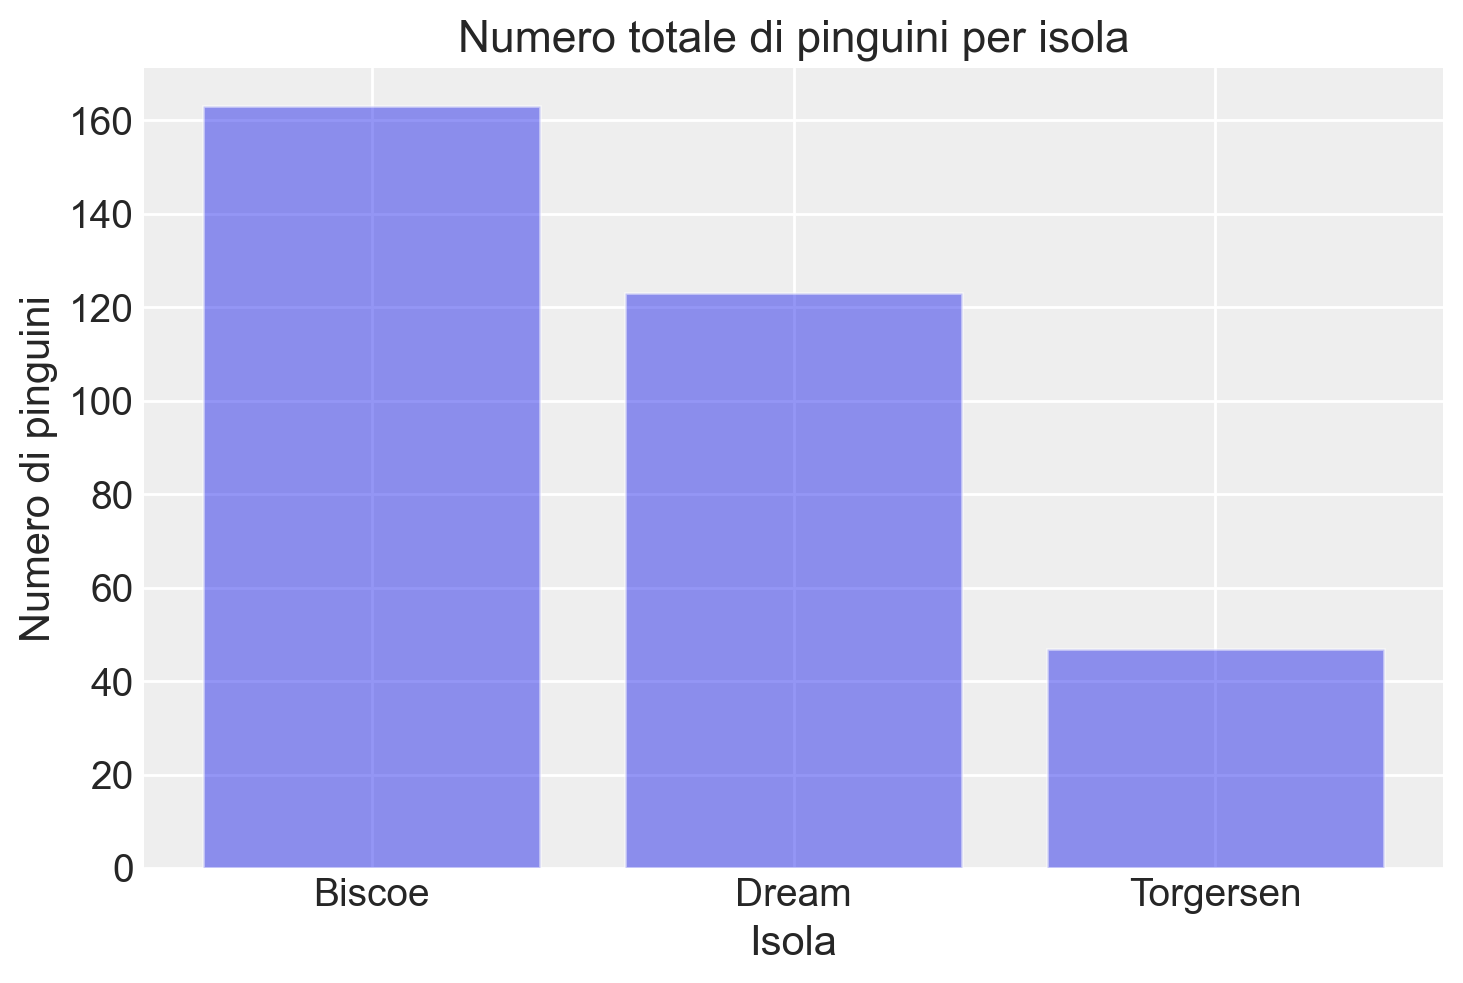

In [11]:
contingency_table_sum = contingency_table.sum(axis=1).reset_index()
plt.bar(contingency_table_sum["island"], contingency_table_sum[0], alpha=0.5)
plt.title("Numero totale di pinguini per isola")
plt.xlabel("Isola")
plt.ylabel("Numero di pinguini")
plt.show()

Un secondo grafico a barre mostra il numero totale di pinguini per specie.

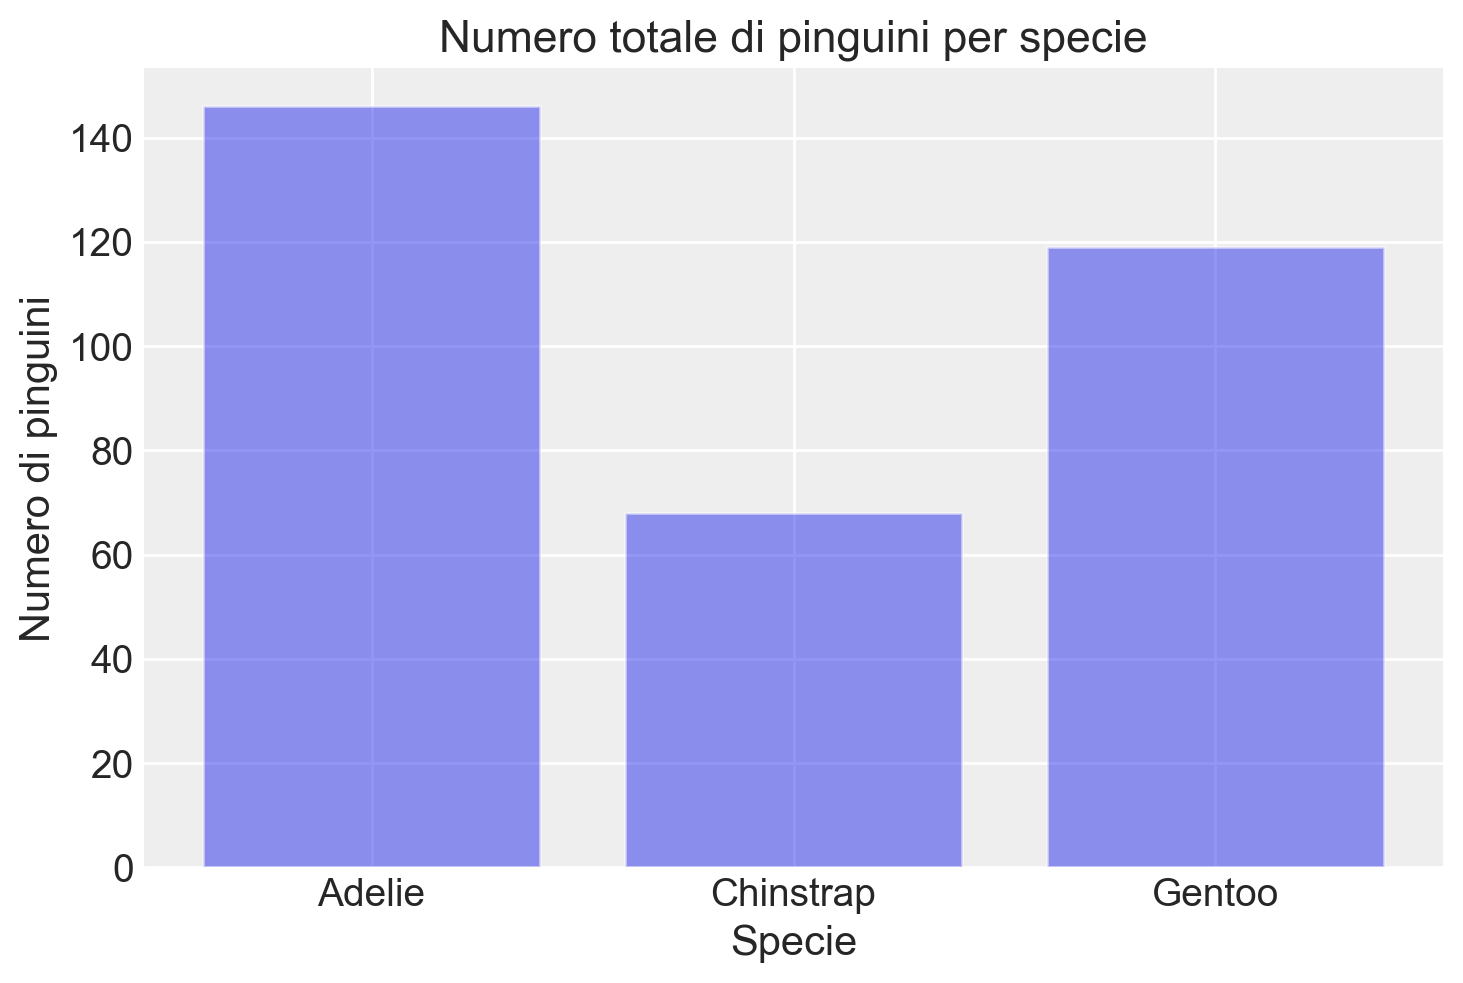

In [12]:
contingency_table_species_sum = contingency_table.sum(axis=0).reset_index()
plt.bar(
    contingency_table_species_sum["species"],
    contingency_table_species_sum[0],
    alpha=0.5,
)
plt.title("Numero totale di pinguini per specie")
plt.xlabel("Specie")
plt.ylabel("Numero di pinguini")
plt.show()

### Grafico a Barre con Due Variabili

È possibile visualizzare contemporaneamente le distribuzioni di due variabili categoriali utilizzando un grafico a barre. Questo tipo di grafico è particolarmente utile per esaminare la relazione tra due variabili categoriali.

In un grafico a barre con due variabili, una delle variabili viene rappresentata sull'asse orizzontale come categoria principale, mentre la seconda variabile è distinta tramite colori diversi o barre impilate. In questo modo, possiamo confrontare facilmente le frequenze o le proporzioni delle categorie della prima variabile, osservando allo stesso tempo come sono distribuite le categorie della seconda variabile all'interno di ciascuna categoria principale.

Ad esempio, visualizziamo il numero di pinguini per specie e isola. A qusto fine possiamo creare un grafico a barre dove le isole sono rappresentate sull'asse delle ascisse e i diversi colori delle barre mostrano la distribuzione delle specie su ciascuna isola. Questo approccio consente di esplorare come le due variabili categoriali (specie e isola) interagiscono visivamente.

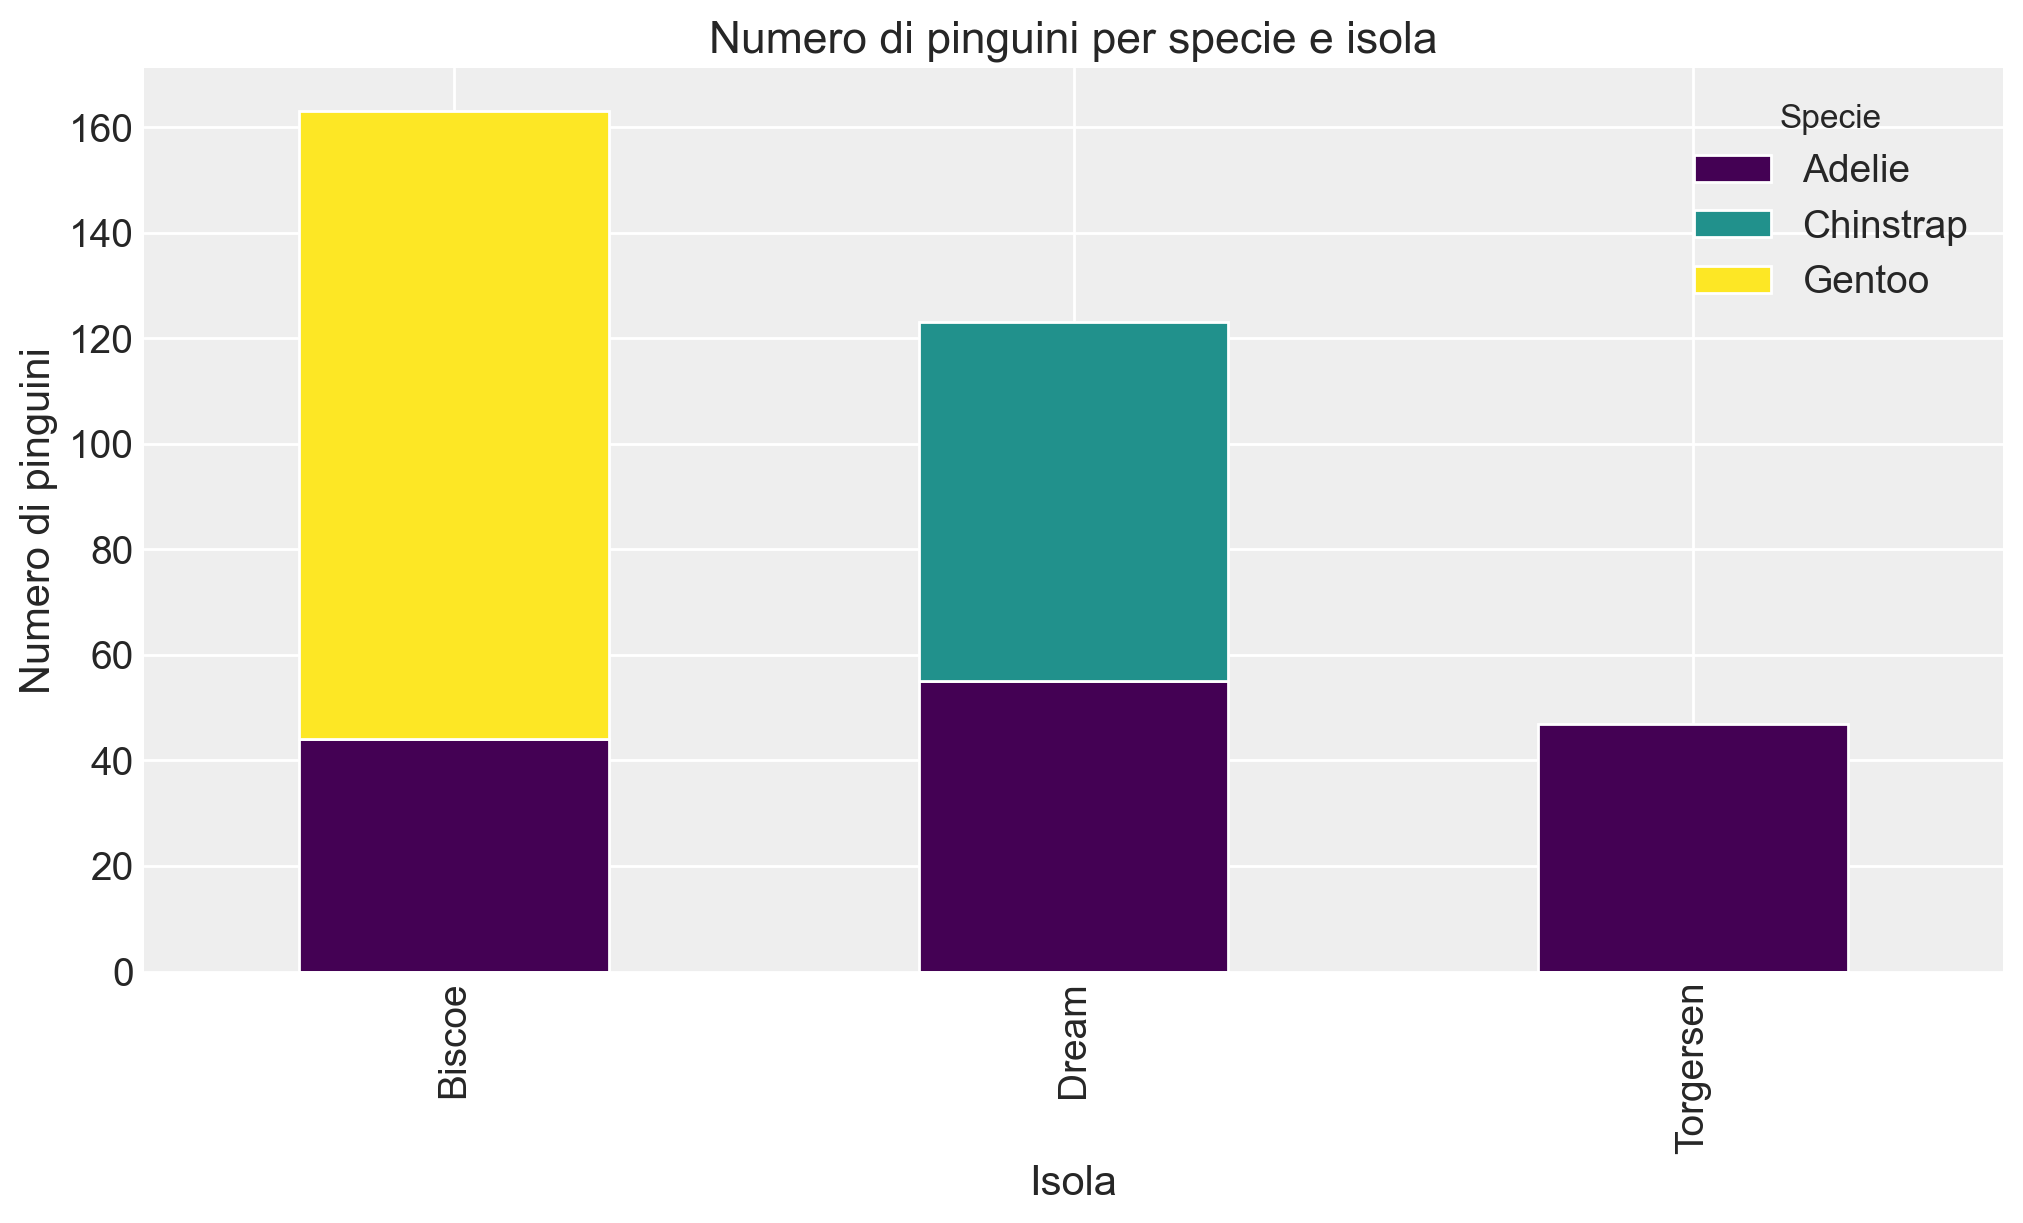

In [13]:
contingency_table.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Numero di pinguini per specie e isola")
plt.xlabel("Isola")
plt.ylabel("Numero di pinguini")
plt.legend(title="Specie")
plt.show()

In alternativa, è possibile creare un grafico a barre dove le specie sono rappresentate sull'asse delle ascisse e i diversi colori delle barre mostrano la distribuzione delle isole per ciascuna specie. 

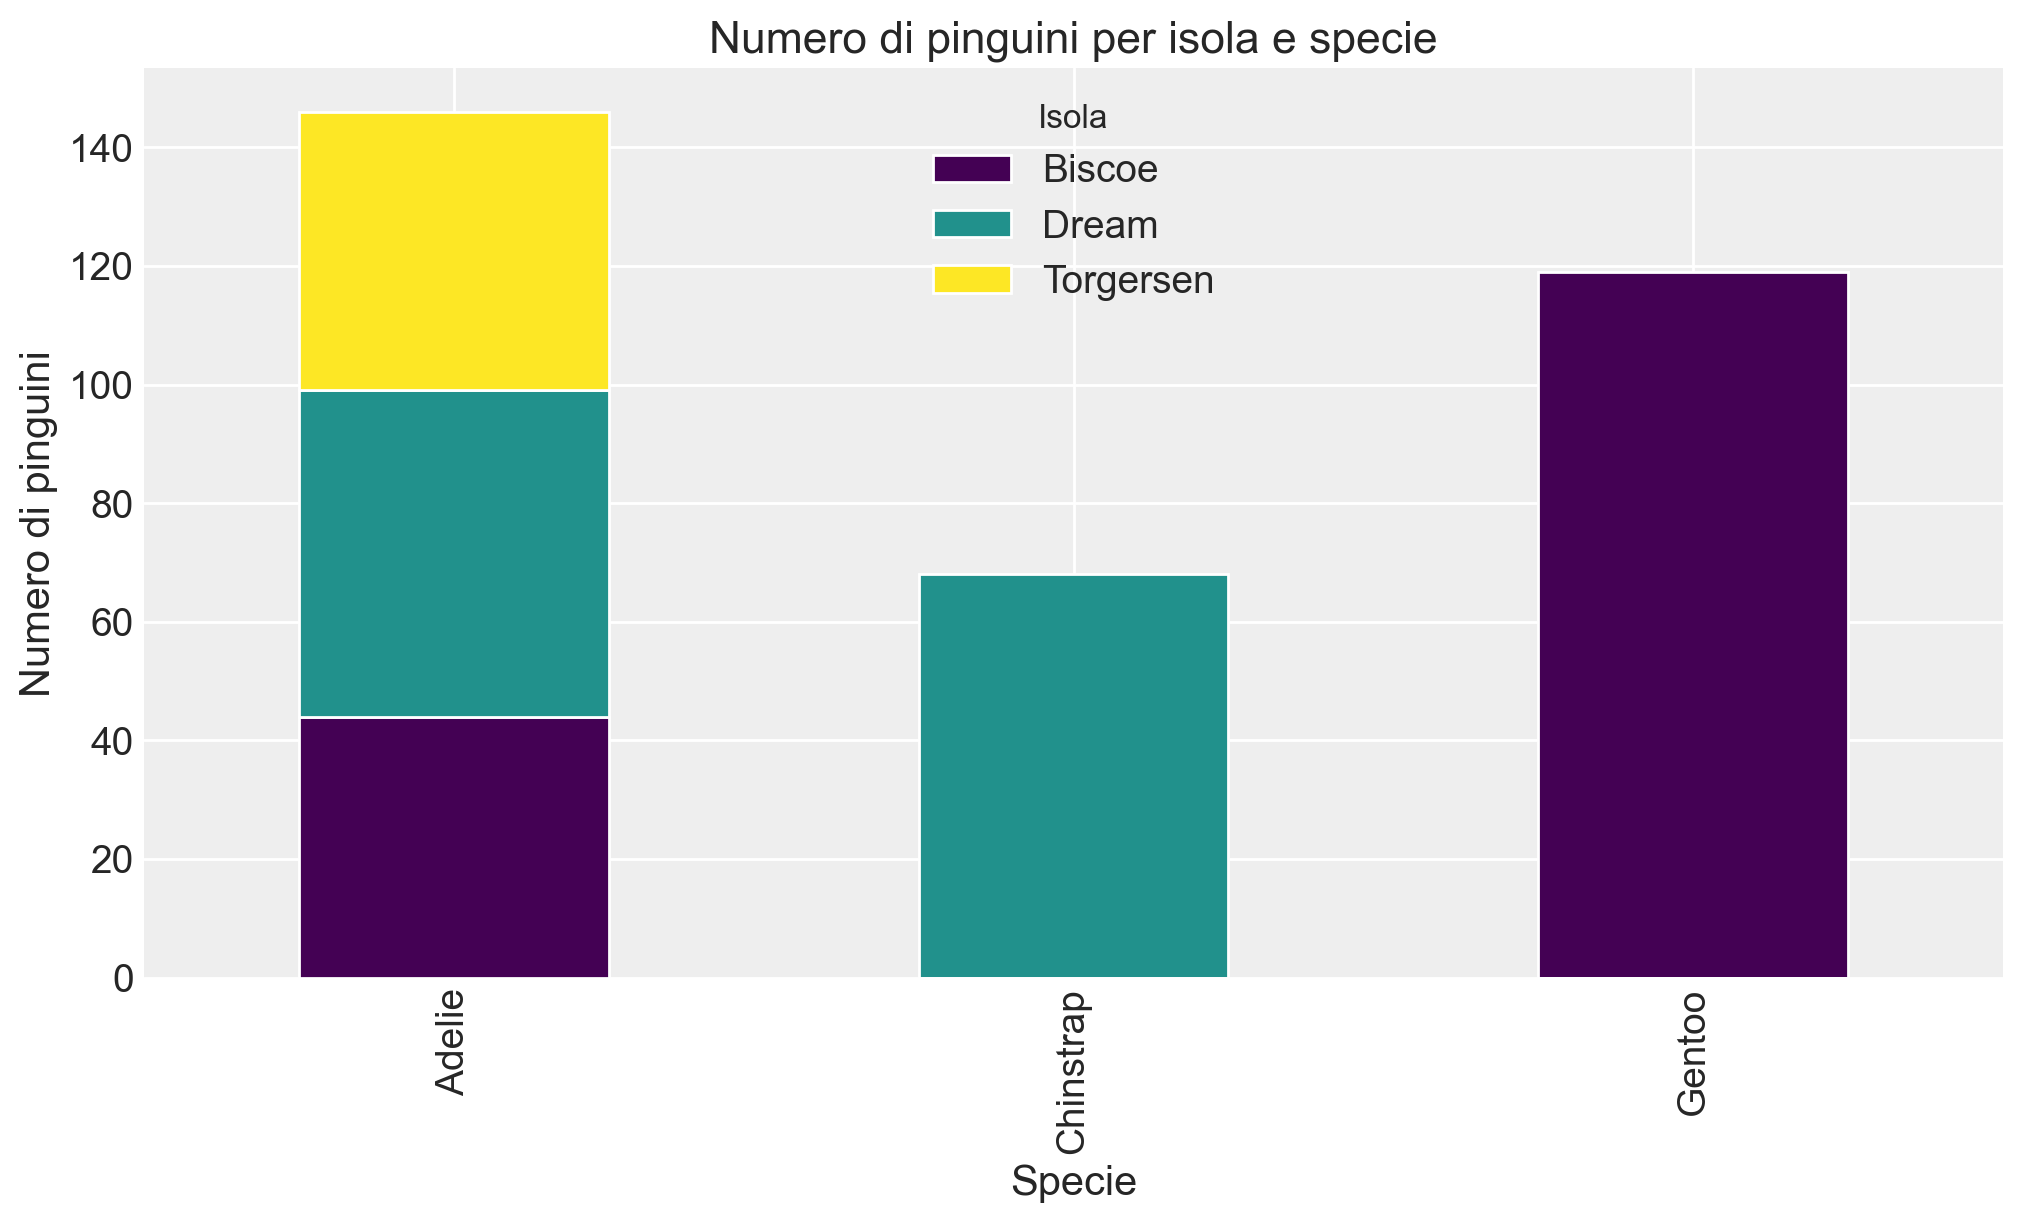

In [14]:
contingency_table.T.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Numero di pinguini per isola e specie")
plt.xlabel("Specie")
plt.ylabel("Numero di pinguini")
plt.legend(title="Isola")
plt.show()

In alternativa all'uso delle frequenze assolute, possiamo rappresentare i dati utilizzando le frequenze relative. Questo approccio permette di confrontare meglio le categorie indipendentemente dal numero totale di osservazioni. Nella figura seguente, ad esempio, viene mostrata la proporzione di pinguini di ciascuna specie per ogni isola, evidenziando la distribuzione relativa delle specie su ogni isola, anziché il conteggio assoluto. Questa rappresentazione aiuta a visualizzare le differenze nella composizione delle specie, anche se il numero complessivo di pinguini varia tra le isole.

/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_47978/957400763.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


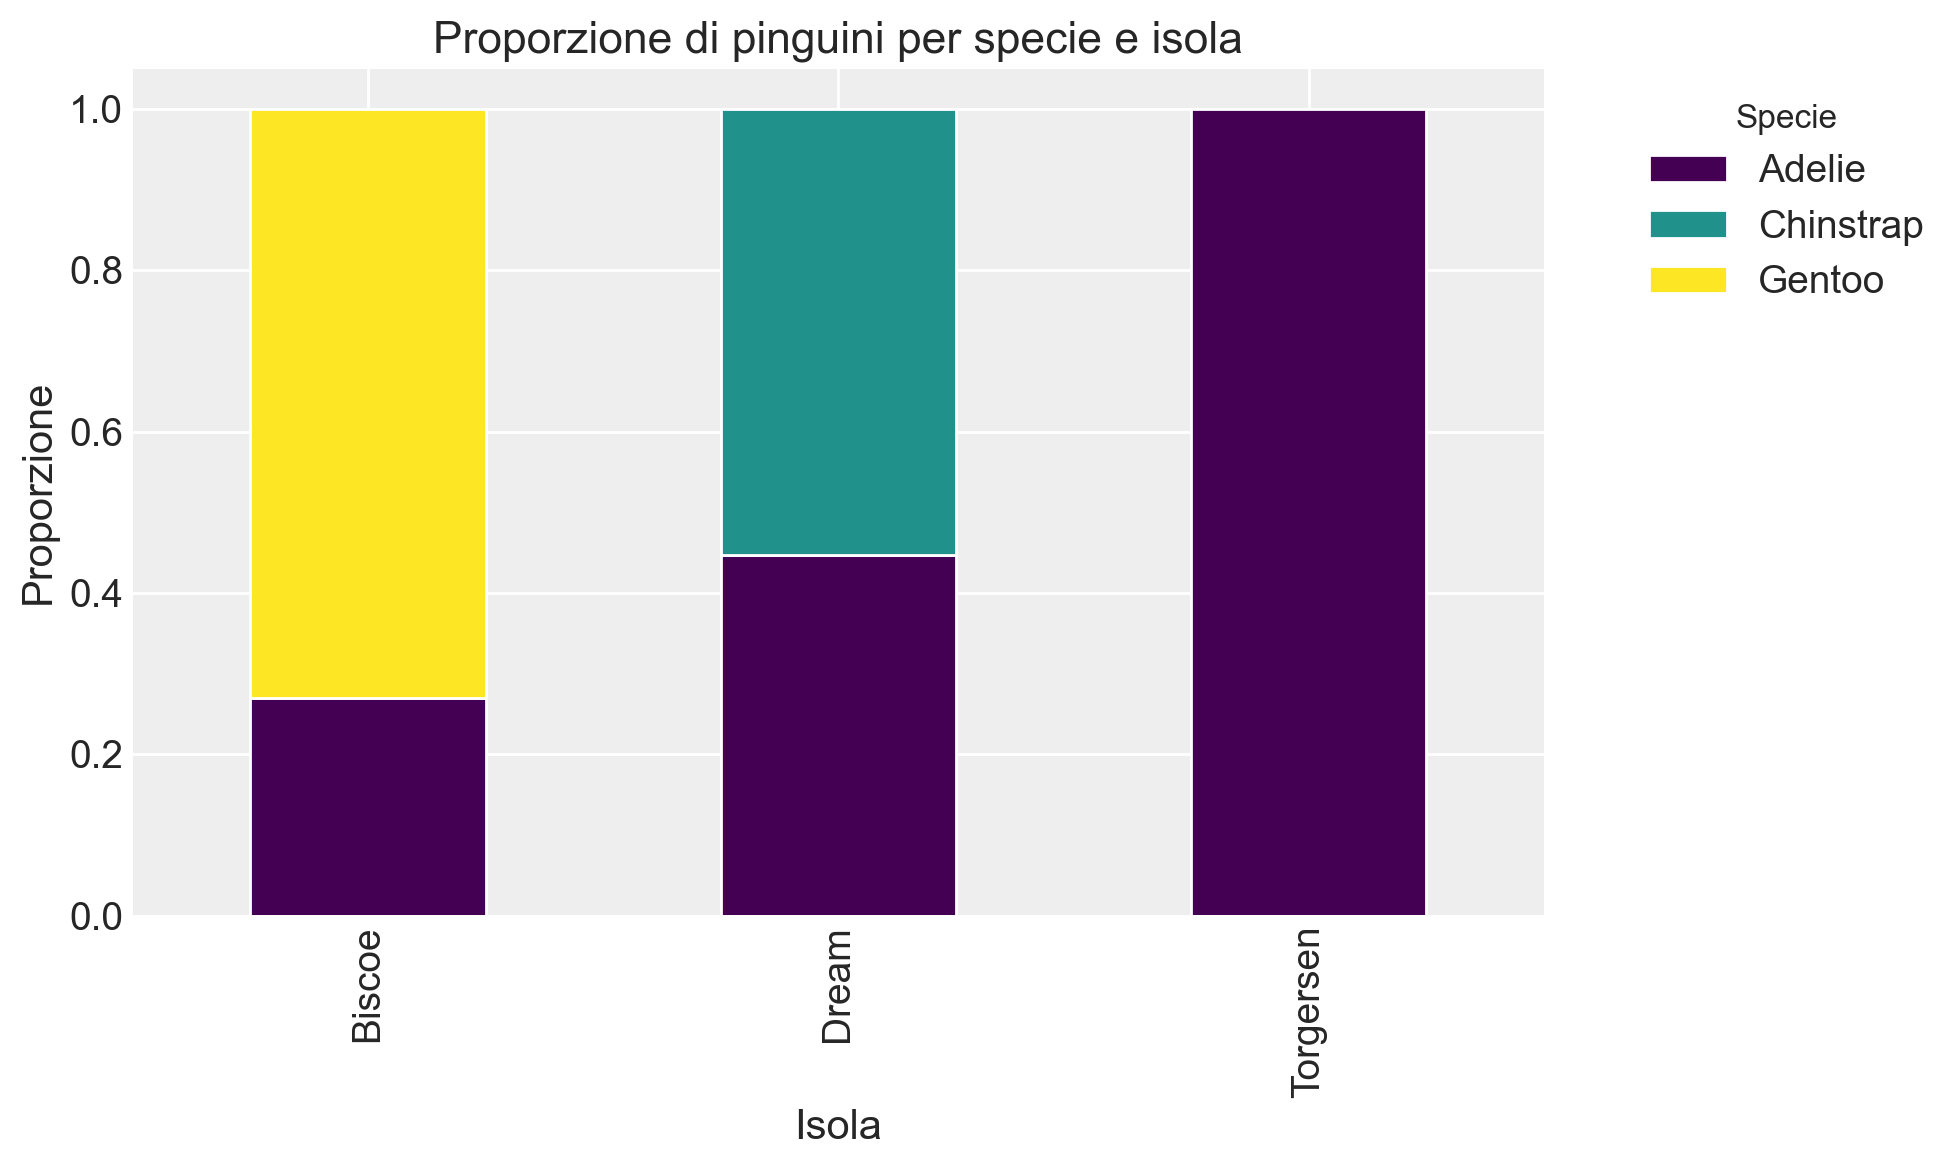

In [15]:
# Trasformazione della tabella di contingenza in proporzioni per ogni riga (isola)
contingency_table_prop = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Rappresentazione visiva in termini proporzionali
ax = contingency_table_prop.plot(
    kind="bar", stacked=True, figsize=(10, 6), colormap="viridis"
)

# Modifichiamo la leggenda per posizionarla al di fuori del grafico
plt.title("Proporzione di pinguini per specie e isola")
plt.xlabel("Isola")
plt.ylabel("Proporzione")

# Posizioniamo la leggenda al di fuori del grafico per migliorare la leggibilità
plt.legend(title="Specie", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

## Mosaic plots

Il *Mosaic plot* è una tecnica di visualizzazione particolarmente adatta per rappresentare tabelle di contingenza. Questo tipo di grafico somiglia a un grafico a barre impilate standard, ma con un vantaggio importante: oltre a visualizzare la suddivisione interna delle categorie, permette di vedere anche le dimensioni relative dei gruppi della variabile principale.

In altre parole, il Mosaic plot non solo mostra come si distribuiscono le categorie di una variabile secondaria all'interno di ogni gruppo della variabile principale, ma fornisce anche un'idea visiva della grandezza complessiva dei gruppi. Questo lo rende uno strumento utile per analizzare e interpretare le relazioni tra due variabili categoriali, evidenziando sia la proporzione all'interno di ciascun gruppo, sia la grandezza relativa tra i gruppi stessi.

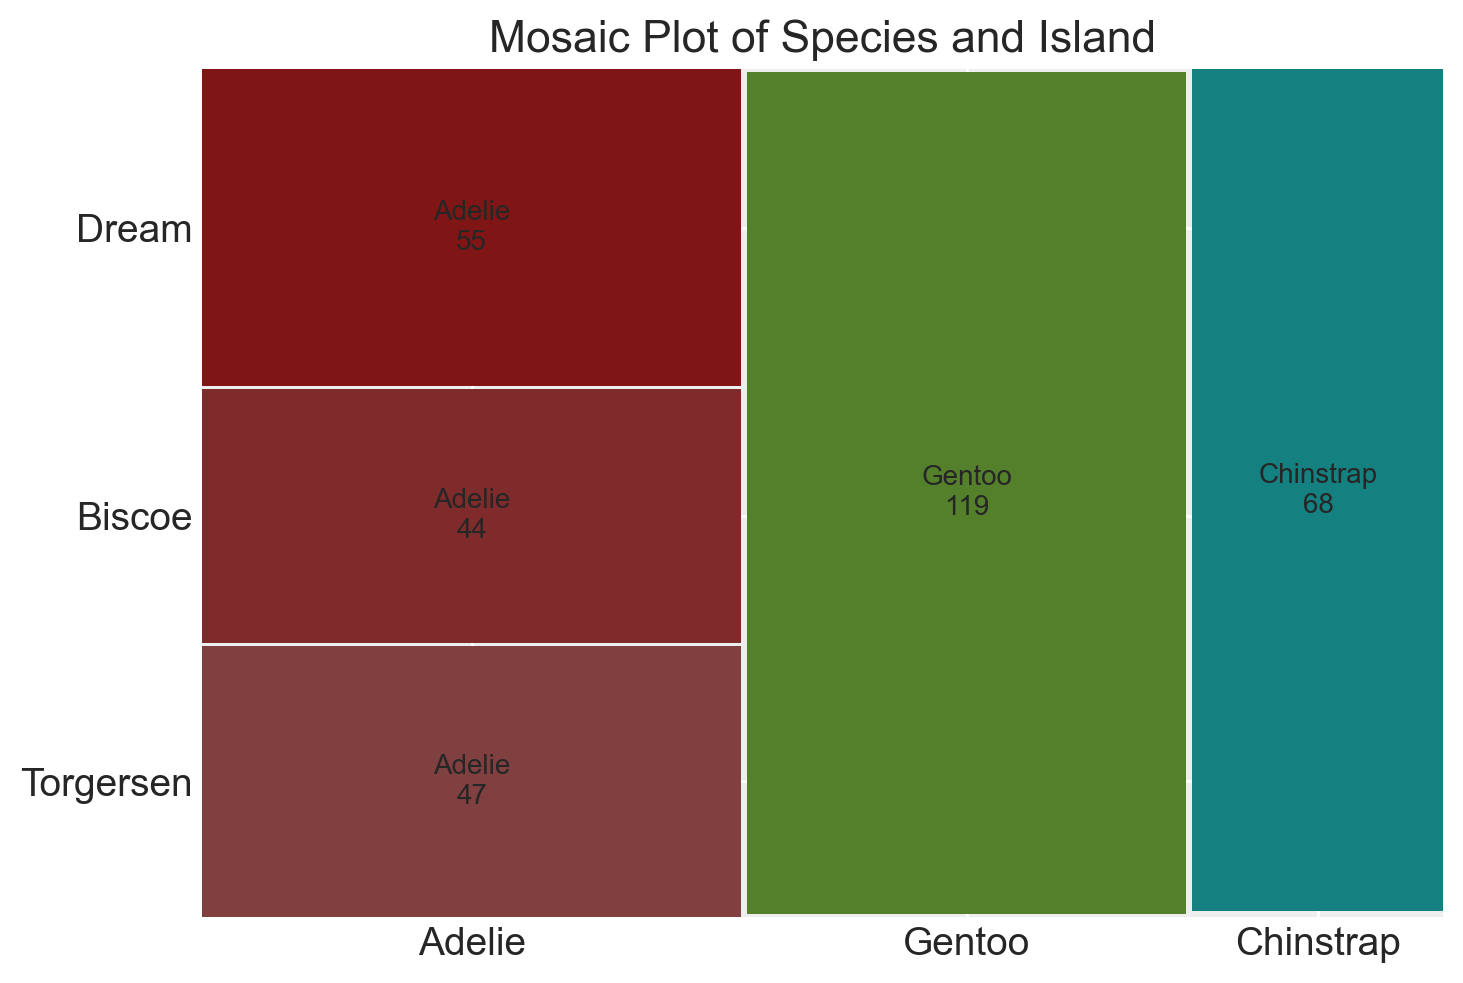

In [16]:
# Funzione per personalizzare le etichette (evita di mostrare etichette troppo piccole)
def labelizer(key):
    species, island = key
    count = df[(df["species"] == species) & (df["island"] == island)].shape[0]
    if count > 1:  # Definisci una soglia per visualizzare le etichette
        return f"{species}\n{count}"
    else:
        return ""


mosaic(df, ["species", "island"], labelizer=labelizer)
plt.title("Mosaic Plot of Species and Island")
plt.show()

## Proporzioni di Riga e Colonna

Nelle sezioni precedenti abbiamo esaminato la visualizzazione di due variabili categoriali utilizzando grafici a barre e Mosaic plot. Tuttavia, non abbiamo ancora discusso come vengono calcolate le proporzioni mostrate in questi grafici. In questa sezione ci concentreremo sulla suddivisione frazionaria di una variabile rispetto a un'altra, esplorando come possiamo modificare la nostra tabella di contingenza per ottenere una visione più dettagliata delle proporzioni.

Questo ci permetterà di comprendere meglio le relazioni tra le due variabili, visualizzando non solo i conteggi assoluti, ma anche le proporzioni relative per riga o per colonna. Le proporzioni di riga mostrano la distribuzione di una variabile all'interno delle categorie di un'altra, mentre le proporzioni di colonna evidenziano la distribuzione inversa.

Calcoliamo le proporzioni di specie per isola.

In [17]:
row_proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Aggiungiamo una colonna "Totale" che rappresenta il totale di ciascuna riga
row_proportions_with_total = row_proportions.copy()
row_proportions_with_total["Totale"] = row_proportions.sum(axis=1)

# Mostra la tabella con le proporzioni di riga e il totale
print(row_proportions_with_total)

species      Adelie  Chinstrap    Gentoo  Totale
island                                          
Biscoe     0.269939   0.000000  0.730061     1.0
Dream      0.447154   0.552846  0.000000     1.0
Torgersen  1.000000   0.000000  0.000000     1.0


Calcoliamo nuovamente le proporzioni, ma questa volta in funzione delle colonne (per isola).

In [18]:
column_proportions = contingency_table.div(contingency_table.sum(axis=0), axis=1)

# Aggiungiamo una riga "Totale" che rappresenta il totale di ciascuna colonna
column_proportions_with_total = column_proportions.copy()
column_proportions_with_total.loc["Totale"] = column_proportions.sum(axis=0)

# Mostra la tabella con le proporzioni di colonna e il totale
print(column_proportions_with_total)

species      Adelie  Chinstrap  Gentoo
island                                
Biscoe     0.301370        0.0     1.0
Dream      0.376712        1.0     0.0
Torgersen  0.321918        0.0     0.0
Totale     1.000000        1.0     1.0


## Confronto tra Gruppi

Alcune delle analisi più interessanti emergono confrontando i dati numerici tra diversi gruppi. In questa sezione approfondiremo alcune delle tecniche che abbiamo già esplorato per visualizzare i dati numerici di più gruppi su uno stesso grafico e introdurremo nuovi metodi per confrontare i dati numerici tra gruppi. Queste tecniche ci permetteranno di osservare meglio le differenze e le somiglianze tra gruppi, mettendo in evidenza tendenze, variazioni e altre caratteristiche rilevanti.

Iniziamo considerando due variabili qualitative. Creiamo un grafico a barre per confrontare la distribuzione del genere per specie.

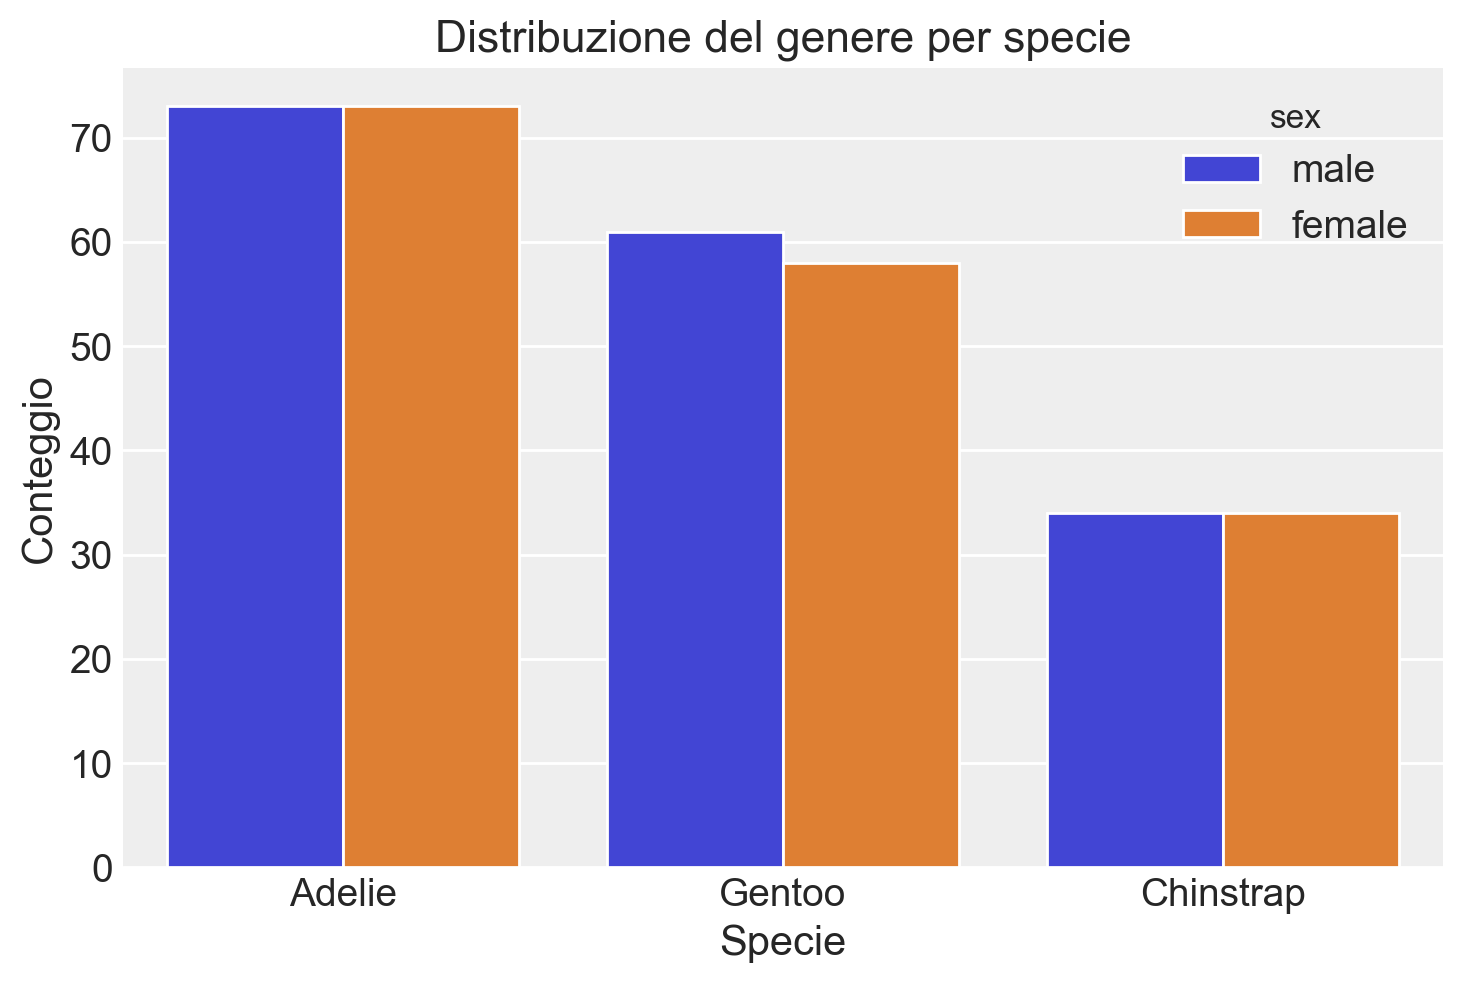

In [19]:
sns.countplot(data=df, x="species", hue="sex")
plt.title("Distribuzione del genere per specie")
plt.xlabel("Specie")
plt.ylabel("Conteggio")
plt.show()

Molto spesso i confronti più interessanti sono quelli che riguardano la distribuzione di una variabile numerica in funzione di una o più variabili qualitative.

Per fare un esempio, generiamo un grafico che confronta la distribuzione del peso corporeo (`body_mass_g`) in funzione della specie e del genere. Le diverse aree colorate rappresentano la distribuzione del peso per maschi e femmine all'interno di ciascuna specie.

/var/folders/s7/z86r4t9j6yx376cm120nln6w0000gn/T/ipykernel_47978/2495003544.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


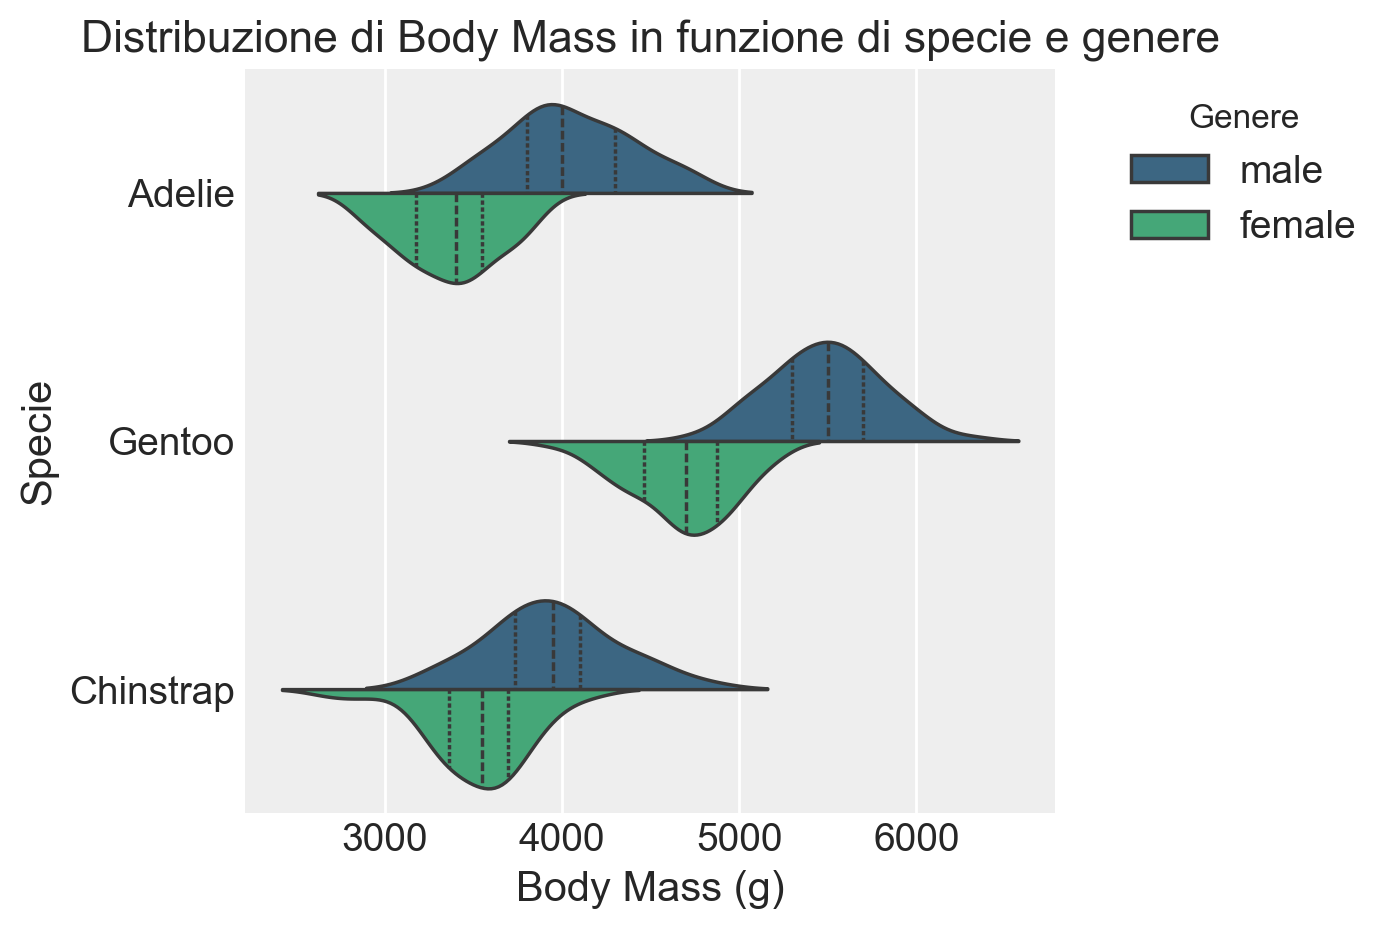

In [20]:
sns.violinplot(
    data=df,
    x="body_mass_g",
    y="species",
    hue="sex",
    split=True,
    inner="quart",
    palette="viridis",
)

plt.title("Distribuzione di Body Mass in funzione di specie e genere")
plt.xlabel("Body Mass (g)")
plt.ylabel("Specie")

plt.legend(title="Genere", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Codice R

Puoi accedere alla versione in R del codice di questo notebook [qui](../../r/eda/04_exploring_qualitative_data.R).

## Informazioni sull'Ambiente di Sviluppo {.unnumbered}

In [21]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Thu Sep 12 2024

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

matplotlib: 3.9.1
seaborn   : 0.13.2
arviz     : 0.18.0
numpy     : 1.26.4
pandas    : 2.2.2

Watermark: 2.4.3

